In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

**Data Exploration**

In [ ]:
DATASET_ENCODING = "ISO-8859-1"
training_data = pd.read_csv('/content/twitter_training.csv', encoding=DATASET_ENCODING)
print("\nTraining Dataset Structure:")
print(training_data.info())


Training Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TweetID       74682 non-null  int64 
 1   Borderlands   74682 non-null  object
 2   sentiment     74682 non-null  object
 3   TweetContent  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [ ]:
validation_data=pd.read_csv('/content/twitter_validation.csv')
print("\nValidation Dataset Structure:")
print(validation_data.info())


Validation Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TweetID       1000 non-null   int64 
 1   Borderlands   1000 non-null   object
 2   sentiment     1000 non-null   object
 3   TweetContent  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
None


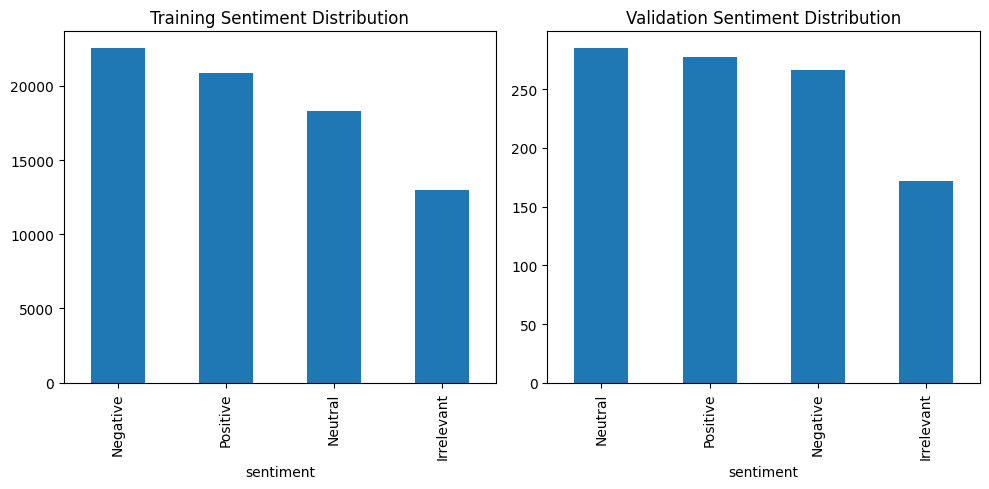

In [ ]:
# Explore distribution of sentiment classes
training_sentiment_distribution = training_data['sentiment'].value_counts()
validation_sentiment_distribution = validation_data['sentiment'].value_counts()

# Plot distribution of sentiment classes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Training Sentiment Distribution')
training_sentiment_distribution.plot(kind='bar')

plt.subplot(1, 2, 2)
plt.title('Validation Sentiment Distribution')
validation_sentiment_distribution.plot(kind='bar')

plt.tight_layout()
plt.show()

**Data Cleaning and Preprocessing**

In [ ]:
def preprocess_text(TweetContent):
    TweetContent=str(TweetContent)
    text = re.sub(r'http\S+', '', TweetContent)
    text = re.sub(r'[^\w\s]', '', TweetContent )
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = TweetContent.lower()
    return TweetContent

training_data['clean_text'] = training_data['TweetContent'].apply(preprocess_text)
validation_data['clean_text'] = validation_data['TweetContent'].apply(preprocess_text)

# Handle missing or erroneous data
training_data.dropna(inplace=True)
validation_data.dropna(inplace=True)


In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(training_data['clean_text'], training_data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
print(le.classes_)

['Irrelevant' 'Negative' 'Neutral' 'Positive']


In [ ]:
le = LabelEncoder()
le.fit(['0', '1', '2'])

LabelEncoder()

In [ ]:
invalid_labels = []
for i in range(len(y_train)):
    if y_train[i] >= 3:
        invalid_labels.append(y_train[i])

for i in range(len(y_val)):
    if y_val[i] >= 3:
        invalid_labels.append(y_val[i])

if len(invalid_labels) > 0:
    print(f"Invalid labels found: {invalid_labels}")

Invalid labels found: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

**Model Development**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Create bag-of-words model pipeline
bow_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Train bag-of-words model
bow_pipeline.fit(X_train, y_train)

# Evaluate bag-of-words model
bow_predictions = bow_pipeline.predict(X_val)
bow_accuracy = accuracy_score(y_val, bow_predictions)
print("Bag-of-Words Model Accuracy:", bow_accuracy)


Bag-of-Words Model Accuracy: 0.7488513513513514


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF model pipeline
tfidf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

# Train TF-IDF model
tfidf_pipeline.fit(X_train, y_train)

# Evaluate TF-IDF model
tfidf_predictions = tfidf_pipeline.predict(X_val)
tfidf_accuracy = accuracy_score(y_val, tfidf_predictions)
print("TF-IDF Model Accuracy:", tfidf_accuracy)


TF-IDF Model Accuracy: 0.7117567567567568


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='tf')
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, return_tensors='tf')

# Convert labels to TensorFlow tensors
train_labels = tf.convert_to_tensor(y_train)
val_labels = tf.convert_to_tensor(y_val)

# Fine-tune BERT model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


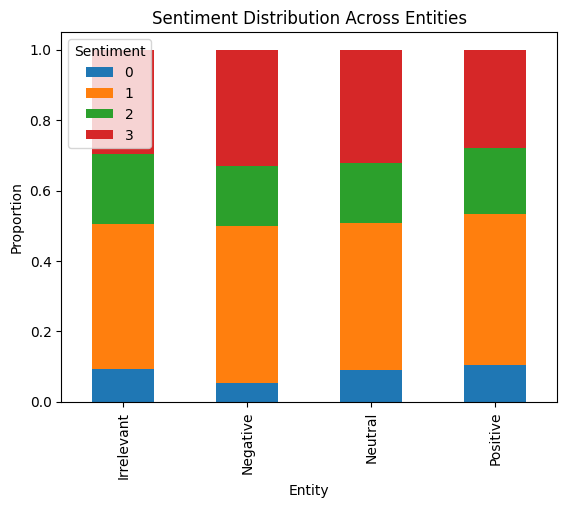

In [ ]:
# Assuming you have predicted sentiment labels for the validation data using your trained models

# Concatenate validation data with predicted labels
validation_data['predicted_sentiment'] = tfidf_predictions[:1000]  # Change to predictions from your chosen model

# Calculate sentiment distribution across entities
sentiment_distribution = validation_data.groupby('sentiment')['predicted_sentiment'].value_counts(normalize=True)

# Visualize sentiment distribution
sentiment_distribution.unstack().plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Entities')
plt.xlabel('Entity')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()
